In [66]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [67]:
df=pd.read_csv("C:\\Users\\manna\\Downloads\\IRIS.csv")

In [68]:
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [69]:
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [70]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=df)
plt.title("Sepal_Length vs. Sepal_Width")


Text(0.5, 1.0, 'Sepal_Length vs. Sepal_Width')

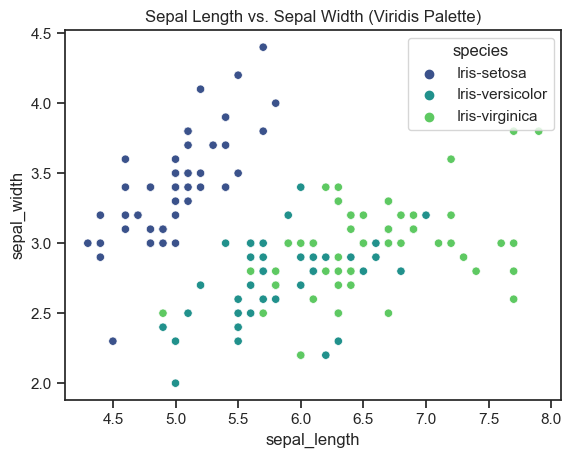

In [73]:
 
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=df, palette="viridis")
plt.title("Sepal Length vs. Sepal Width (Viridis Palette)")

plt.show()

In [75]:
sns.pairplot(df)

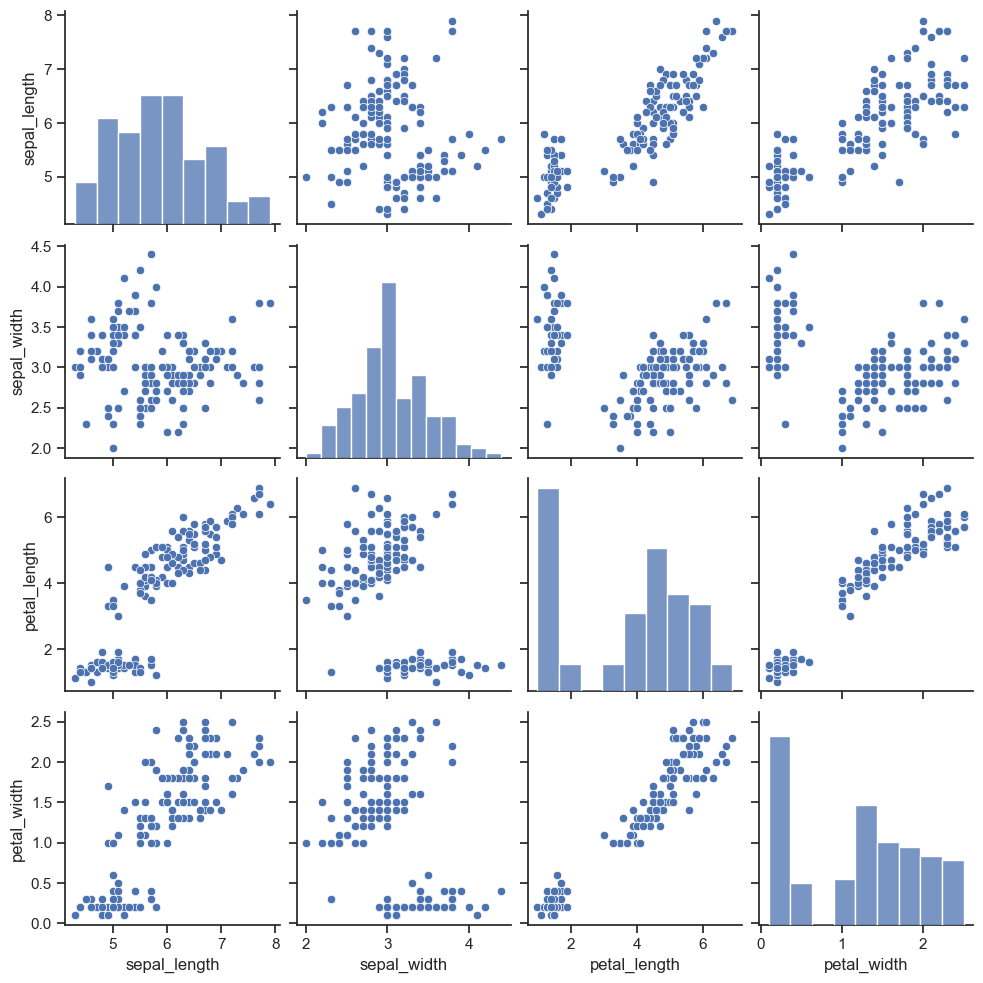

In [76]:
plt.show()

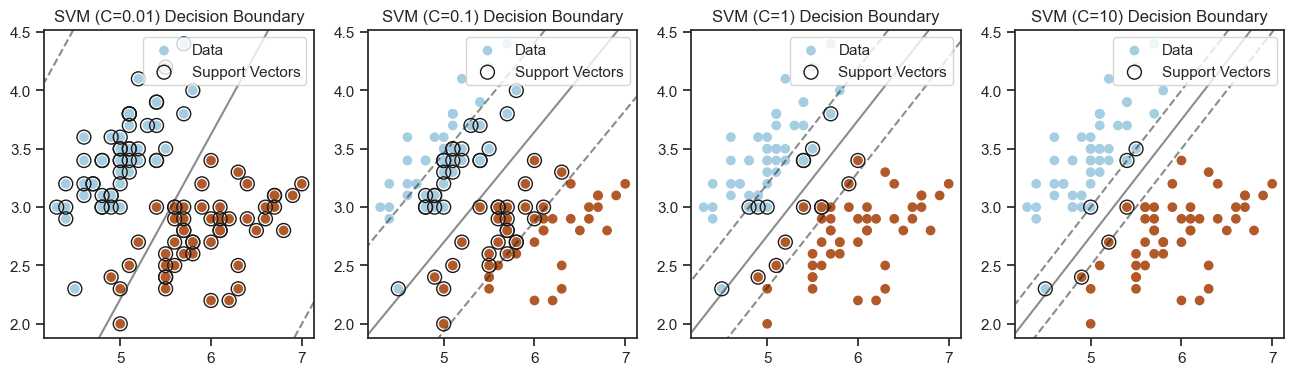

In [86]:
data = iris.data
target = iris.target

# We will use only two classes (Setosa and Versicolor) for binary classification
X = data[target != 2, :2]  # Select the first two features and two classes
y = target[target != 2]  # Class labels (0 for Setosa, 1 for Versicolor)

# Experiment with different values of the regularization parameter C
C_values = [0.01, 0.1, 1, 10]
plt.figure(figsize=(16, 4))

for i, C in enumerate(C_values):
    plt.subplot(1, 4, i + 1)

    # Create and fit the SVM classifier with a linear kernel
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)

    # Visualize the decision boundary, margin, and support vectors
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, label='Data')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create a grid to evaluate the model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

    # Plot support vectors
    plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
                facecolors='none', edgecolors='k', label='Support Vectors')

    plt.title(f'SVM (C={C}) Decision Boundary')
    plt.legend()

plt.show()



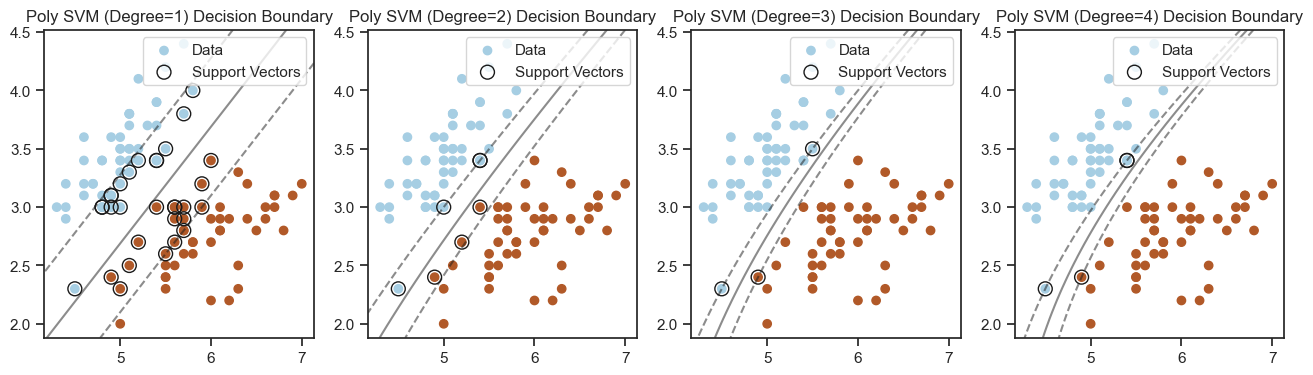

In [93]:
# Experiment with different degrees of the polynomial kernel
degrees = [1, 2, 3, 4]
plt.figure(figsize=(16, 4))

for i, degree in enumerate(degrees):
    plt.subplot(1, 4, i + 1)

    # Create and fit the SVM classifier with a polynomial kernel
    svm = SVC(kernel='poly', degree=degree, C=1)
    svm.fit(X, y)

    # Visualize the decision boundary and support vectors
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, label='Data')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create a grid to evaluate the model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

    # Plot support vectors
    plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
                facecolors='none', edgecolors='k', label='Support Vectors')

    plt.title(f'Poly SVM (Degree={degree}) Decision Boundary')
    plt.legend()

plt.show()


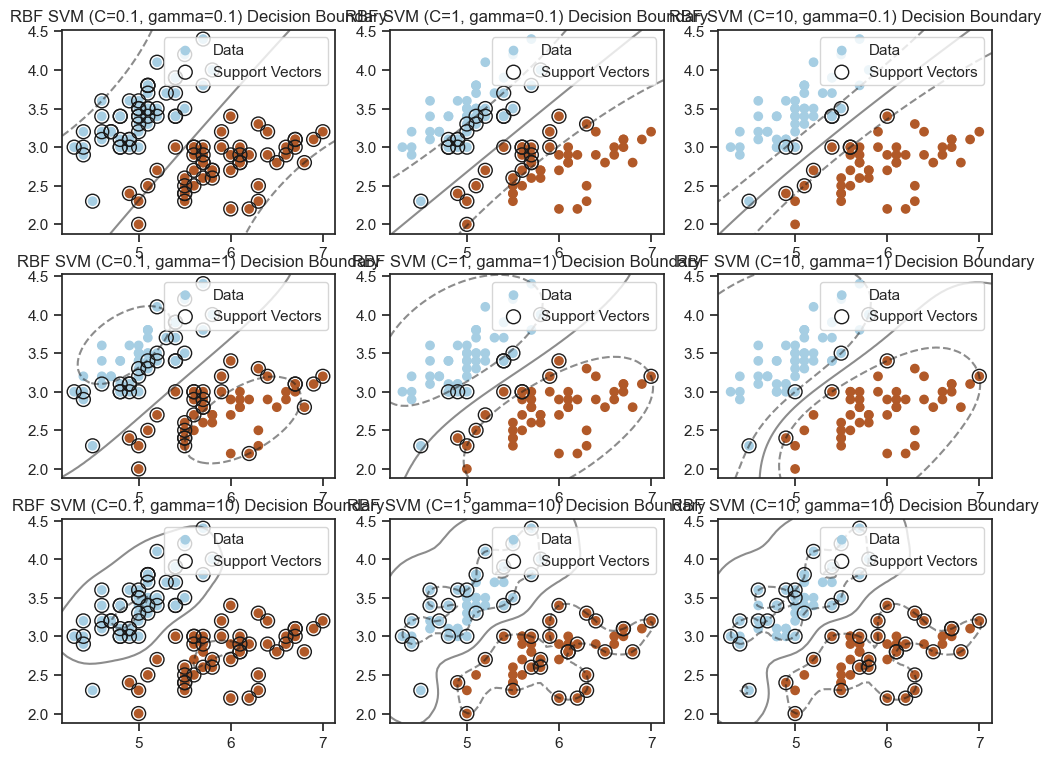

In [94]:
# Experiment with different values of gamma and regularization parameter C
gamma_values = [0.1, 1, 10]
C_values = [0.1, 1, 10]
plt.figure(figsize=(12, 9))

for i, gamma in enumerate(gamma_values):
    for j, C in enumerate(C_values):
        plt.subplot(3, 3, i * len(C_values) + j + 1)

        # Create and fit the SVM classifier with an RBF kernel
        svm = SVC(kernel='rbf', gamma=gamma, C=C)
        svm.fit(X, y)

        # Visualize the decision boundary and support vectors
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, label='Data')
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        # Create a grid to evaluate the model
        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                             np.linspace(ylim[0], ylim[1], 50))
        Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot decision boundary
        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                    linestyles=['--', '-', '--'])

        # Plot support vectors
        plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
                    facecolors='none', edgecolors='k', label='Support Vectors')

        plt.title(f'RBF SVM (C={C}, gamma={gamma}) Decision Boundary')
        plt.legend()

plt.show()


Accuracy without scaling: 1.00
Accuracy with scaling: 1.00


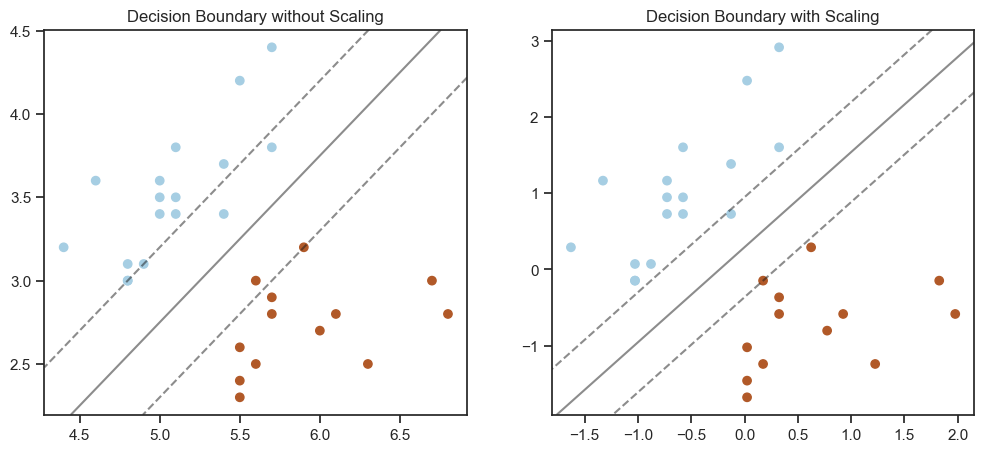

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVM classifier without feature scaling
svm_unscaled = SVC(kernel='linear', C=1)
svm_unscaled.fit(X_train, y_train)

# Train an SVM classifier with feature scaling (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_scaled = SVC(kernel='linear', C=1)
svm_scaled.fit(X_train_scaled, y_train)

# Calculate accuracy for both models
y_pred_unscaled = svm_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

y_pred_scaled = svm_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f'Accuracy without scaling: {accuracy_unscaled:.2f}')
print(f'Accuracy with scaling: {accuracy_scaled:.2f}')

# Visualize decision boundaries
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, label='Data')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z_unscaled = svm_unscaled.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_unscaled = Z_unscaled.reshape(xx.shape)
plt.contour(xx, yy, Z_unscaled, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title('Decision Boundary without Scaling')
plt.subplot(1, 2, 2)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap=plt.cm.Paired, label='Data')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z_scaled = svm_scaled.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_scaled = Z_scaled.reshape(xx.shape)
plt.contour(xx, yy, Z_scaled, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title('Decision Boundary with Scaling')
plt.show()


Linear:
Kernel techniques essentially provide theoretical upper bound guarantees on generalization error and are utilized for non-linear decision boundaries.
When a set of data points can be linearly separated, linear SVM is utilized. You have a collection of 2D points that can be divided by a straight line, just as in 2D. The linear SVM in this situation looks for a straight line that maximizes the margin to the point that is closest to it.
In the Iris dataset, if you are trying to distinguish between two classes that have a clear linear separation, the linear kernel is a good choice.

Polynomial Kernel:
The polynomial kernel SVM utilizes a non-linear function as its kernel, allowing for the calculation of the weight of each feature to be quite complicated. This allows for more accurate classification because it takes into account features in different ways depending on how they are related to the output variable.

RBF (Radial Basis Function) Kernel:
When the classes cannot be separated linearly, we can project the data into a high-dimensional space and, with a high likelihood, obtain a linear separation because SVM is inherently a linear separator. This is the RBF Kernel's application of Cover's theorem, which projects the data into infinite dimensions before determining a linear separation.A RBF kernel is always the first option since it is extremely versatile when data is not linearly separable. 

In [96]:
import numpy as np

class CustomLinearSVM:
    def __init__(self, learning_rate=0.01, num_epochs=1000, C=1.0):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.C = C

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0

        for epoch in range(self.num_epochs):
            for i in range(m):
                condition = y[i] * (np.dot(X[i], self.w) - self.b) >= 1
                if not condition:
                    self.w -= self.learning_rate * (self.w - self.C * y[i] * X[i])
                    self.b -= self.learning_rate * y[i]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) - self.b)

# Load the Iris dataset, preprocess it, and split into train and test sets
# ...

# Train and evaluate your custom SVM
custom_svm = CustomLinearSVM()
custom_svm.fit(X_train, y_train)
y_pred = custom_svm.predict(X_test)
# Calculate accuracy or other metrics

# Train and evaluate a scikit-learn SVM for comparison
from sklearn.svm import SVC
svm_sklearn = SVC(kernel='linear', C=1.0)
svm_sklearn.fit(X_train, y_train)
y_pred_sklearn = svm_sklearn.predict(X_test)
# Calculate accuracy or other metrics

# Compare the performance of your custom SVM with scikit-learn
# ...


In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have already trained and predicted with custom_svm and svm_sklearn

# Calculate accuracy for the custom SVM
accuracy_custom = accuracy_score(y_test, y_pred)

# Calculate precision for the custom SVM
precision_custom = precision_score(y_test, y_pred)

# Calculate recall for the custom SVM
recall_custom = recall_score(y_test, y_pred)

# Calculate F1 score for the custom SVM
f1_custom = f1_score(y_test, y_pred)

# Calculate accuracy for the scikit-learn SVM
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

# Calculate precision for the scikit-learn SVM
precision_sklearn = precision_score(y_test, y_pred_sklearn)

# Calculate recall for the scikit-learn SVM
recall_sklearn = recall_score(y_test, y_pred_sklearn)

# Calculate F1 score for the scikit-learn SVM
f1_sklearn = f1_score(y_test, y_pred_sklearn)

# Print the metrics
print("Custom SVM:")
print(f"Accuracy: {accuracy_custom:.2f}")
print(f"Precision: {precision_custom:.2f}")
print(f"Recall: {recall_custom:.2f}")
print(f"F1 Score: {f1_custom:.2f}")

print("\nScikit-learn SVM:")
print(f"Accuracy: {accuracy_sklearn:.2f}")
print(f"Precision: {precision_sklearn:.2f}")
print(f"Recall: {recall_sklearn:.2f}")
print(f"F1 Score: {f1_sklearn:.2f}")


Custom SVM:
Accuracy: 0.43
Precision: 0.43
Recall: 1.00
F1 Score: 0.60

Scikit-learn SVM:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
